In [1]:
import numpy as np
import pandas as pd

# 1. Download data

In [2]:
train=pd.read_csv("D:/python_study/Assignment1/train.csv")

# 2. Data exploration

## 2.1 data structure description

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Age,Cabin,and Embarked have missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

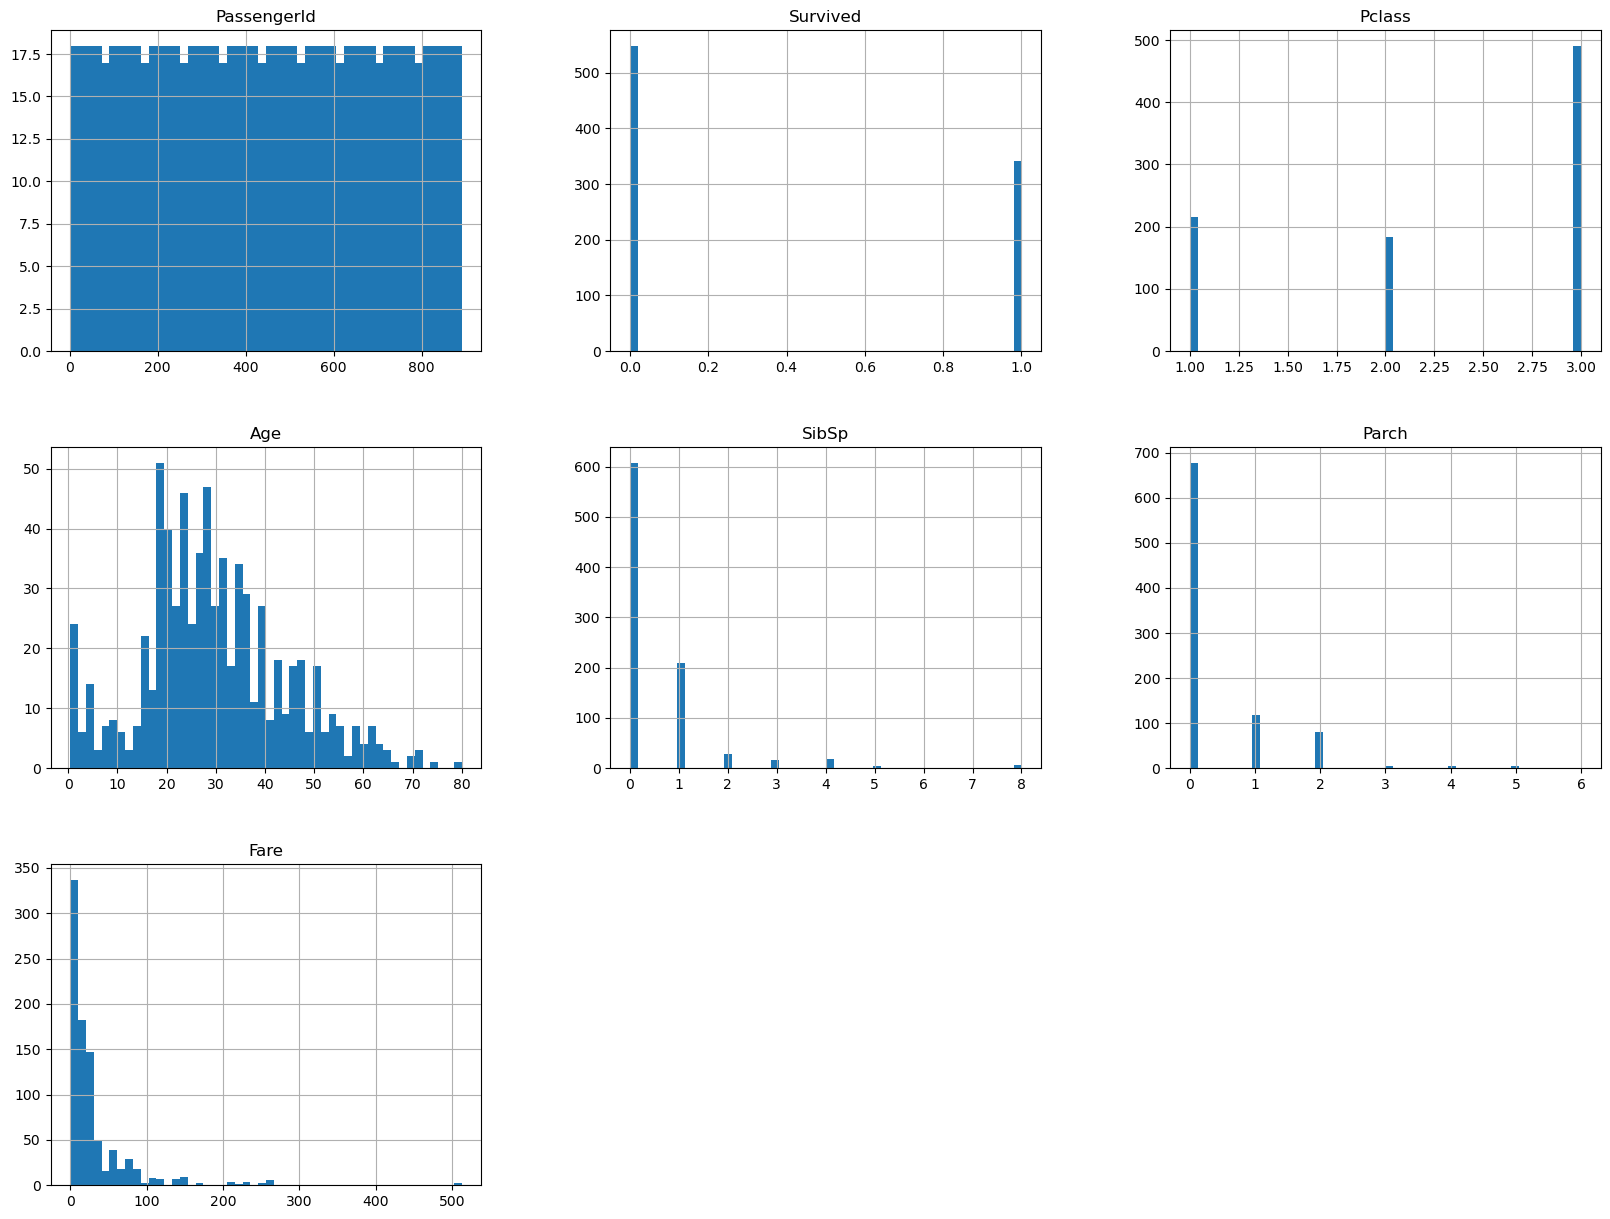

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [9]:
train.Sex.value_counts(normalize=True,dropna=False)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [10]:
train.Cabin.value_counts(normalize=True,dropna=False)

NaN            0.771044
C23 C25 C27    0.004489
G6             0.004489
B96 B98        0.004489
C22 C26        0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: Cabin, Length: 148, dtype: float64

In [11]:
train.Embarked.value_counts(normalize=True,dropna=False)

S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: Embarked, dtype: float64

## 2.2  Data visualization

<Axes: xlabel='Age', ylabel='Fare'>

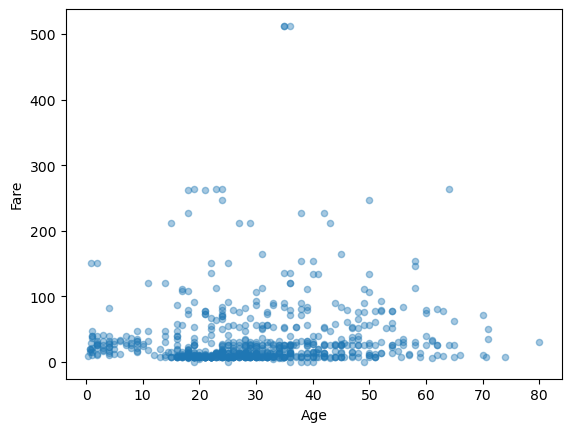

In [12]:
train.plot(kind="scatter", x="Age", y="Fare", alpha=0.4)

<Axes: xlabel='Age', ylabel='Parch'>

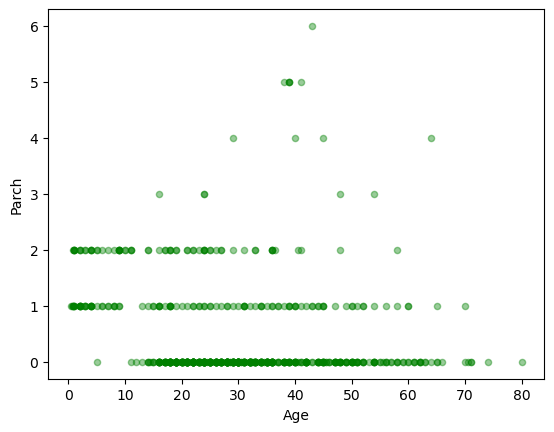

In [13]:
train.plot(kind="scatter", x="Age", y="Parch",alpha=0.4,color="green")

<Axes: xlabel='Age', ylabel='SibSp'>

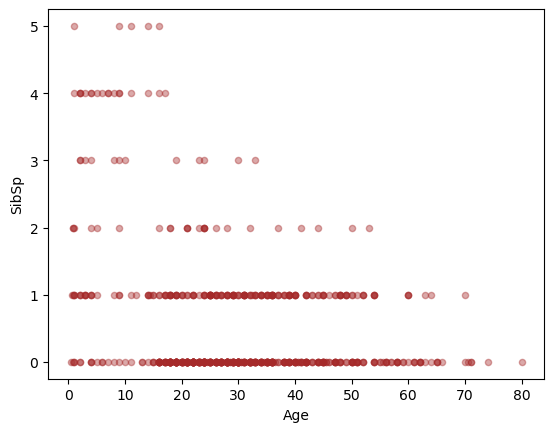

In [14]:
train.plot(kind="scatter", x="Age", y="SibSp",alpha=0.4,color="brown")

<Axes: xlabel='Age', ylabel='Survived'>

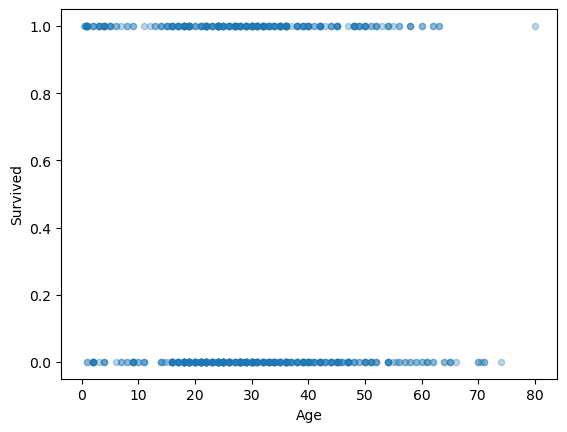

In [15]:
train.plot(kind="scatter", x="Age", y="Survived",alpha=0.3)

<Axes: xlabel='Pclass', ylabel='SibSp'>

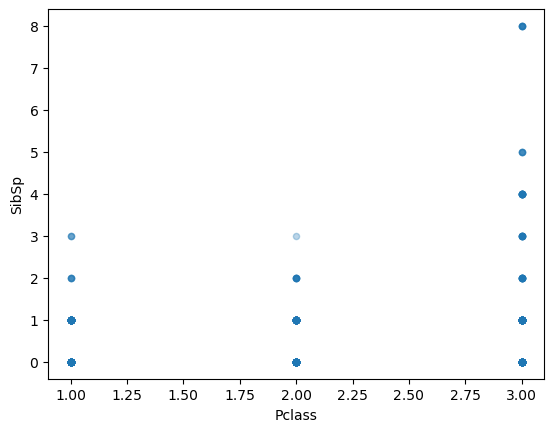

In [16]:
train.plot(kind="scatter", x="Pclass", y="SibSp",alpha=0.3)

<Axes: xlabel='Pclass', ylabel='Fare'>

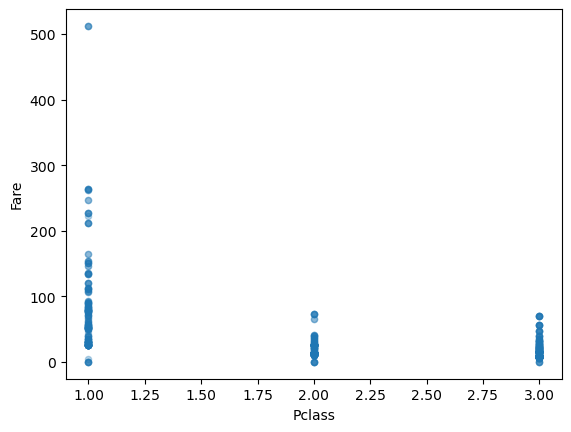

In [17]:
train.plot(kind="scatter", x="Pclass", y="Fare",alpha=0.3)

## 2.3 feature correlation analysis

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
features_unique=["Name","PassengerId","Ticket"]
features_cat=['Sex','Cabin','Embarked']
features_num=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
#corelation coefficient matrix
corr = train[features_num].corr()  
corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


# 3. Data preparation

In [21]:
Y=train["Survived"].copy()

In [22]:
X=train.drop("Survived",axis=1)

## 3.1 removing features with unique values

In [23]:
X.drop(features_unique,axis=1,inplace=True)

## 3.2 removing features with high missing value

In [24]:
X.drop("Cabin", axis=1,inplace=True) 

In [25]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

## 3.3 filling Missing value& Standardization&Dummy variables

In [26]:
X_num = X.drop(['Embarked','Sex'], axis=1)
X_cat = X.loc[:,['Embarked','Sex']]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer_median',SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pineline=Pipeline([
        ('imputer_mode',SimpleImputer(strategy="most_frequent")),
        ('OneHotEncoder',OneHotEncoder())
    
    ])

num_attribs = list(X_num)
cat_attribs = list(X_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat",cat_pineline, cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [27]:
X_prepared

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  1.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

## 3.4 test dataset preparation

In [28]:
test=pd.read_csv("D:/python_study/Assignment1/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
X_test=test.drop(["Cabin","Name","PassengerId","Ticket"],axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [30]:
X_test_prepared = full_pipeline.transform(X_test)

# 4. Training Model

## 4.1 Naive_Bays

In [31]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

Classifier=gnb.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)

In [32]:
#计算评估指标
from sklearn.metrics import roc_curve,auc,accuracy_score,precision_score
from sklearn.model_selection import cross_val_score

def display_metrics(Y,Y_predictions,Classifier):
    false_positive_rate, recall, thresholds = roc_curve(Y,Y_predictions)
    roc_auc = auc(false_positive_rate, recall)
    accuracy=accuracy_score(Y,Y_predictions)
    precision=precision_score(Y,Y_predictions)
    print(f" Accuracy：{accuracy:.2f}  AUC：{roc_auc:.2f}   Precision：{precision:.2f}")

#     scores = cross_val_score(Classifier,X_prepared,Y,
#                                 scoring="accuracy", cv=10) 
#    print(f" Mean_accuracy:{scores.mean():.2f}\n accuracy:{scores:}")
#    print(f"Standard deviation:{scores.std():.2f}")

display_metrics(Y,Y_predictions,Classifier)

 Accuracy：0.79  AUC：0.78   Precision：0.72


In [33]:
# test 预测
def pickup_model(Classifier,test_set):
    predictions = Classifier.predict(test_set)
    return predictions

In [34]:
np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)

In [35]:
test_prediction.head()
test_prediction["Survived"].value_counts()

0    239
1    179
Name: Survived, dtype: int64

In [36]:
test_prediction.to_csv("D:/python_study/Assignment1/submission_GaussianNB.csv",index=False)

## 4.2 DecisionTree

In [37]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="gini",
                                  max_depth=5,
                                  min_samples_leaf=10,
                                  random_state=28)

Classifier=tree_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_DecisionTree.csv",index=False)

 Accuracy：0.83  AUC：0.80   Precision：0.87


## 4.3 Neural_NetWork Perceptron

In [38]:
# neural_network Perceptron
from sklearn.neural_network import MLPClassifier

nnk_clf = MLPClassifier(solver='adam',
                        alpha=1,
                        max_iter=1000,
                        random_state=42)

Classifier=nnk_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_NetWorkPerception_adam.csv",index=False)

 Accuracy：0.85  AUC：0.82   Precision：0.86


## 4.4 LogisticRegression

In [39]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

lg_reg=LogisticRegression()

Classifier=lg_reg.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_LG_Regression.csv",index=False)

 Accuracy：0.80  AUC：0.78   Precision：0.76


## 4.5 RandomForest

In [40]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10,
                                    max_depth=4,
                                    max_features=3,
                                    #min_samples_split=10,
                                    #min_samples_leaf=5,
                                    random_state=42)

Classifier=forest_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_RandomForest.csv",index=False)

 Accuracy：0.84  AUC：0.81   Precision：0.85


# 5.Fine Tune NewWork Perception (the best predictions in test dataset)

## 5.1 Ajusting hyperparameter: solver='lbfgs'

In [41]:
from sklearn.neural_network import MLPClassifier

nnk_clf = MLPClassifier(solver='lbfgs',
                        alpha=1,
                        max_iter=5000,
                        random_state=42)

Classifier=nnk_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_NetWorkPerception_lbfgs.csv",index=False)

 Accuracy：0.87  AUC：0.85   Precision：0.90


## 5.2 Ajusting hyperparameter: solver='sgd'

In [42]:
from sklearn.neural_network import MLPClassifier

nnk_clf = MLPClassifier(solver='sgd',
                        learning_rate_init=0.05,
                        alpha=1,
                        max_iter=1000,
                        random_state=42)

Classifier=nnk_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_NetWorkPerception_sgd.csv",index=False)

 Accuracy：0.85  AUC：0.82   Precision：0.88


## 5.3 Ajusting hyperparameter: alpha=0.002

In [43]:
from sklearn.neural_network import MLPClassifier

nnk_clf = MLPClassifier(solver='adam',
                        alpha=0.002,
                        max_iter=1000,
                        random_state=42)

Classifier=nnk_clf.fit(X_prepared, Y)
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_NetWorkPerception_adam_alpha.csv",index=False)

 Accuracy：0.87  AUC：0.84   Precision：0.89


## 5.4 GridSearch the optimal hyperparameters for NetWorkPerception

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 27 (3*3*3) combinations of hyperparameters
    { 'learning_rate_init':[0.001,0.005,0.01],'alpha':[0.3,0.5,1]}
  ]

Classifier = MLPClassifier(solver='adam',max_iter=1000,random_state=42)

grid_search = GridSearchCV(Classifier, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(X_prepared,Y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid=[{'alpha': [0.3, 0.5, 1],
                          'learning_rate_init': [0.001, 0.005, 0.01]}],
             return_train_score=True, scoring='accuracy')

In [45]:
grid_search.best_params_

{'alpha': 0.3, 'learning_rate_init': 0.001}

In [46]:
cvres = grid_search.cv_results_
for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(accuracy, params)

0.8260749482141737 {'alpha': 0.3, 'learning_rate_init': 0.001}
0.8103571652752496 {'alpha': 0.3, 'learning_rate_init': 0.005}
0.8204255853367648 {'alpha': 0.3, 'learning_rate_init': 0.01}
0.8226853304877283 {'alpha': 0.5, 'learning_rate_init': 0.001}
0.8249262444291006 {'alpha': 0.5, 'learning_rate_init': 0.005}
0.8249262444291006 {'alpha': 0.5, 'learning_rate_init': 0.01}
0.815956311593748 {'alpha': 1, 'learning_rate_init': 0.001}
0.8193019898311468 {'alpha': 1, 'learning_rate_init': 0.005}
0.8103634423451134 {'alpha': 1, 'learning_rate_init': 0.01}


In [47]:
Classifier = grid_search.best_estimator_
Y_predictions =Classifier.predict(X_prepared)
display_metrics(Y,Y_predictions,Classifier)

 Accuracy：0.85  AUC：0.82   Precision：0.89


In [48]:
np_predictions=pickup_model(Classifier,X_test_prepared)
test_prediction= pd.concat([test["PassengerId"],pd.DataFrame(np_predictions,columns=["Survived"])],axis= 1)
test_prediction.to_csv("D:/python_study/Assignment1/submission_FineTuneNNK.csv",index=False)